<a name='introduction'></a>
# Проект "Исследование данных о российском кинопрокате"

**Введение**

Необходимо проанализировать базу данных о фильмах, предоставленных порталом "Кинопоиск", на различные взаимозависимости между параметрами. Сначала будет проведена предобработка данных, далее перейдем к исследовательскому анализу данных, а потом будет проведен анализ фильмов, получивших государственное финансирование.

**План работы**:
1. [Импортирование библиотек и файлов](#import)
2. [Предобработка данных](#preprocessing)
    - [Типы данных](#types)
    - [Пропуски](#missing_values)
    - [Дубликаты](#duplicates)
    - [Категориальные переменные](#categorical_cols)
    - [Количественные переменные](#numeric_cols)
    - [Feature Engineering](#feature_engineering)
3. [Исследовательский анализ данных](#eda)
4. [Исследование фильмов с гос. поддержкой](#state_support_research)
5. [Общий вывод](#conclusion)

<a name='import'></a>
## 1. Импортирование библиотек и файлов  

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/datasets/mkrf_movies.csv")
df2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [40]:
# Избавимся от строки со значением 'puNumber' равным 'нет' c целью объединения двух датафреймов
df = df.drop(index=df[df['puNumber'] == "нет"].index)

df['puNumber'] = df['puNumber'].astype('int64')
df = df.merge(df2, on='puNumber', how='outer')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<a name='preprocessing'></a>
## 2. Предобработка данных
[Вернуться во Введение](#introduction)

In [41]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<a name='types'></a>
### 2. 1. Типы данных

Необходимо изменить типы данных в следующих столбцах в датафрейме:
- [x] show_start_date
- [x] ratings

Категория **"show_start_date"**

In [42]:
# Изменить тип данных на datetime, а также оставим лишь дату первого дня показа
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date.astype('datetime64[ns]')

In [43]:
df['show_start_date']

0      2015-11-27
1      2016-09-13
2      2016-10-10
3      2016-06-10
4      2015-07-29
          ...    
7480   2019-12-23
7481   2019-12-24
7482   2019-12-28
7483   2019-12-30
7484   2019-12-30
Name: show_start_date, Length: 7485, dtype: datetime64[ns]

Категория **"ratings"**

In [44]:
# Заменим стопроцентную шкалу на десятибалльную
df['ratings'] = df['ratings'].replace('%', "", regex=True).astype('float64')

df.loc[df['ratings'] > 10, 'ratings'] /= 10

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

<a name='missing_values'></a>
### 2. 2. Пропуски

Количество пропущенных значений по следующим категориям мало, а учитывая, что не предполагается анализировать влияние данного параметра, то эти фильмы можно оставить:

- film_studio
- director

По ниже приведенным категориям имеются пропущенные значения, поскольку их в действительно нет (а не ввиду, например, ошибки):
- producer
- refundable_support
- nonrefundable_support
- financing_source
- budget

Необходимо рассмотреть пропуски по следующим категориям:
- [x] production_country
- [x] ratings
- [x] genres

(последние четыре связаны между собой)

Категория **"production_country"**

In [46]:
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [47]:
# Поскольку всего у двух фильмов отсутствует значение параметра "production_country",
# то заполним данные пропуски по информации из Интернета
df.loc[3185, "production_country"] = 'СССР, Россия'
df.loc[4440, "production_country"] = 'Россия'

Категория **"ratings"**

In [48]:
# У подавляющего большинства фильмов с пропущенными значениями в графе "rating" отсутствует рейтинг на кинопоиске, что связано
# с недостаточным количеством оценок. Ввиду этого, лучше оставить фильмы "без рейтинга", поскольку таких значений немало.

df[df['genres'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Категория **"genres"**

In [49]:
# Пропущенные значения по категории "genres" можно в большей степени связать с ошибкой при составлении таблицы, поскольку
# на сайте кинопоиске по фильмам (по крайне мере первых пяти) имеется их жанр 
df[df['genres'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Рассмотрим возможную взаимосвязь отсутствия значения по категориям "genres" и "ratings".

Далее можно заметить, что почти во всех случаях наблюдается отсутствие двух показателей, ввиду чего можно сказать скорее об ошибки при заполнении таблицы (в некоторых случаях у фильма недостаточно оценок для формирования рейтинга).

In [50]:
display("Количество фильмов с пропущенными значениями по параметрам 'genres' и 'ratings': {}".format(
    df[df['genres'].isna() & df['ratings'].isna()]['title'].count()))
display("Количество фильмов с пропущенным значениям по 'genres' и заполненным по 'ratings': {}".format(
    df[df['genres'].isna() & df['ratings'].notna()]['title'].count()))

"Количество фильмов с пропущенными значениями по параметрам 'genres' и 'ratings': 966"

"Количество фильмов с пропущенным значениям по 'genres' и заполненным по 'ratings': 9"

<a name='duplicates'></a>
### 2. 3. Дубликаты

По количественным значениям дубликаты могут возникать и их не нужно удалять (категории **'refundable_support', 'nonrefundable_support', 'budget', 'ratings'**).

Дубликаты по таким категориальным столбцам, как: **'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres', 'show_start_date'** - обусловлены именно тем, что они являются категориальными и могут встречаться у разных фильмов. 

Категория **'puNumber'**

In [53]:
# По данной категории количество уникальных значений должно совпадать с количеством фильмов в датафрейме
display("Количество уникальных значений по 'puNumber': {}".format(len(df['puNumber'].unique())))
display("Количество фильмов: {}".format(len(df)))

"Количество уникальных значений по 'puNumber': 7483"

'Количество фильмов: 7485'

Категория **'film_studio'**

По столбцу **'film_studio'** дубликаты могли возникнуть ввиду большого количества фильмов и различных студий, поэтому составители таблицы могли, например, забыть данное ими первоначально название отдельной студии.

In [54]:
display(df['film_studio'].unique())
display("Количество уникальных значений по столбцу 'film_studio': {}".format(len(df['film_studio'].unique())))

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

"Количество уникальных значений по столбцу 'film_studio': 5491"

<a name='categorical_cols'></a>
### 2. 4. Категориальные переменные

Одной из основных проблем, встречающихся почти во всех категориальных столбцах является возможные проблемы в начале или в конце значения. Ввиду этого появляются неявные дубликаты, от которых необходимо избавиться. Самый простой пример можно лицезреть на категории "type", где всего 8 уникальных значений, два из которых имеют лишь лишние пробелы в начале (всего тогда получается 6 типов фильмов).

По категориям: **1) show_start_date, 2) ratings, 3) age_restriction, 4) refundable_support, 5) nonrefundable_support и 6) financing_source** - значения могут совпадать.

По категориям: **а) type, b) film_studio, c) production_country, d) director, e) producer, f) genres** - выявлены и удалены неявные дубликаты.

Категории **"type", "film_studio", "production_country", "producer", "director", "genres"** 

Попробуем найти неявные дубликаты, которые обнаружим с помощью использования функции .strip().

In [55]:
cols = ['type', 'film_studio', 'production_country', 'producer', 'director', 'genres']
for col in cols:
    display(f"Количество уник. значений по '{col}' ДО: {format(len(df[col].unique()))}")
    df[col] = df[col].str.strip()
    display(f"Количество уник. значений по '{col}' После: {format(len(df[col].unique()))}")
    print()

"Количество уник. значений по 'type' ДО: 8"

"Количество уник. значений по 'type' После: 6"

"Количество уник. значений по 'film_studio' ДО: 5491"

"Количество уник. значений по 'film_studio' После: 5463"

"Количество уник. значений по 'production_country' ДО: 950"

"Количество уник. значений по 'production_country' После: 934"

"Количество уник. значений по 'producer' ДО: 5350"

"Количество уник. значений по 'producer' После: 5335"

"Количество уник. значений по 'director' ДО: 4812"

"Количество уник. значений по 'director' После: 4802"

"Количество уник. значений по 'genres' ДО: 743"

"Количество уник. значений по 'genres' После: 743"

<a name='numeric_cols'></a>
### 2. 5. Количественные переменные

Поскольку параметр "budget" демонстрирует общий объем государственной поддержки, то он должен включать в себя как объем возвратных, так и невозвратных средств. Следовательно, сумма объема возвратных и невозвратных средств господдержки не должна превышать полный объем господдержки. Найдем все фильмы, где данноу условие не выполняется и впишем в "budget" общую сумму.

In [56]:
display("Количество фильмов, где объем возвратных и невозвратных средств больше бюджета ДО: {}".format(
    df[df['refundable_support'] + df['nonrefundable_support'] > df['budget']]['budget'].count()))

# Заполним значение параметра "budget" суммой возвратных и невозвратных средств, в случае ее превышения объема бюджета
df.loc[df['refundable_support'] + df['nonrefundable_support'] > df['budget'], 'budget'] = df['refundable_support'] + df['nonrefundable_support']

display("Количество фильмов, где объем возвратных и невозвратных средств больше бюджета ПОСЛЕ: {}".format(
    df[df['refundable_support'] + df['nonrefundable_support'] > df['budget']]['budget'].count()))

'Количество фильмов, где объем возвратных и невозвратных средств больше бюджета ДО: 17'

'Количество фильмов, где объем возвратных и невозвратных средств больше бюджета ПОСЛЕ: 0'

Категория **"box_office"**

Заменим нулевые значения по рассматриваемой категории на NaN для того, чтобы в дальнейшем исключить из анализа те фильмы, прокат в кинотеатрах, как было обнаружено в данных, равен нулю.

In [57]:
display(df[df['box_office'] == 0].head())
df.loc[df['box_office'] == 0, 'box_office'] = None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0


<a name='feature_engineering'></a>
### 2. 6. Feature Engineering

In [58]:
# Вставим столбец с годом премьеры фильма рядом со столбцом с полной датой премьеры
year = df['show_start_date'].dt.year
df.insert(3, 'year', year)
df.head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,2016,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,2015,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [2]:
# Вычленим главного режиссера
def first_instance(x):
    try:
        y = x.split(',')[0]
        return y
    except AttributeError:
        return None

# Вставим новые столбцы с именем главного режиссера и основного жанра рядом с категорией "director" и "genres"
df.insert(8, "main_director", df['director'].apply(first_instance))
df.insert(17, "main_genre", df['genres'].apply(first_instance))
df.head()

In [60]:
df['gov_support'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df.sort_values(by='gov_support', ascending=False).head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,main_director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,main_genre,box_office,gov_support
2873,Помню - не помню!,111004916,2016-03-01,2016,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,комедия,1.536293e+07,1.0
3046,Любовь с ограничениями,111008216,2016-04-29,2016,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,70000000.0,Фонд кино,6.3,"комедия,мелодрама",комедия,7.029905e+07,1.0
6322,Баба Яга,114006518,2018-11-08,2018,Анимационный,"ООО ""Арт Пикчерс Студия""",Россия,В.Саков,В.Саков,"ООО ""Арт Пикчерс Студия"", ООО ""КРИЭЙТИВ АНИМЭЙ...",«6+» - для детей старше 6 лет,0.0,138969465.0,138969465.0,Фонд кино,NaN,NaN,None,1.334699e+06,1.0
6822,Большое путешествие,114002419,2019-04-20,2019,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский",Н.Лопато,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000000.0,120000000.0,180000000.0,Фонд кино,6.2,"мультфильм,комедия,приключения",мультфильм,1.476068e+08,1.0
2531,Бармен.,111009615,2015-05-26,2015,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",комедия,6.741897e+07,1.0


<a name='eda'></a>
## 3. Исследовательский анализ данных
[Вернуться во Введение](#introduction)

**Гипотеза 1: год выпуска влияет на количество фильмов с данными о прокате**

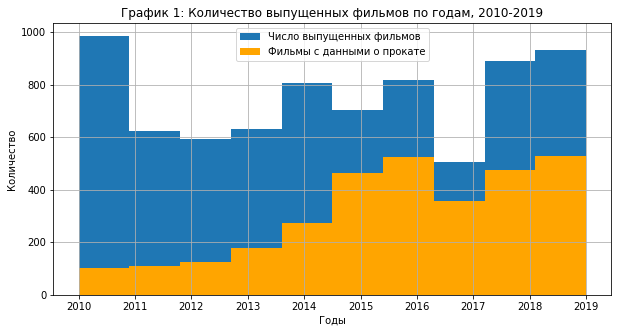

In [61]:
# Для начала посмотрим на графике на количество выпущенных фильмов по годам, 
# а также на количество фильмов с имеющимися данными касательно проката в кинотеатре по годам.

df['year'].plot(
    kind='hist', 
    grid=True, 
    bins=10, 
    figsize=(10, 5), 
    xticks=df['year'].unique(), 
    title="График 1: Количество выпущенных фильмов по годам, 2010-2019",
    legend=True
)

df[df['box_office'].notna()]['year'].plot(
    kind='hist',
    color='orange',
    grid=True,
    xticks=df['year'].unique(),
    figsize=(10, 5),
    legend=True
)

plt.ylabel('Количество')
plt.xlabel("Годы")
plt.legend(['Число выпущенных фильмов', "Фильмы с данными о прокате"])
plt.show()

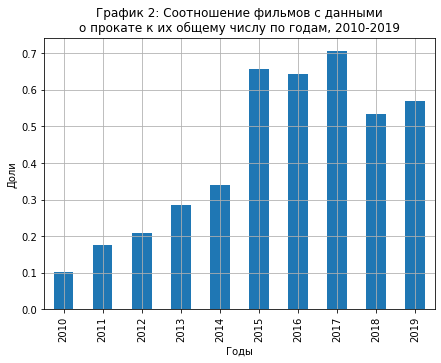

In [63]:
# Составим сводную таблицу для определения доли фильмов с информацией о прокате в кинотеатрах
pt_year_boffice_ratio = df.pivot_table(index='year', values=['title', 'box_office'], aggfunc='count')
pt_year_boffice_ratio['ratio'] = pt_year_boffice_ratio['box_office'] / pt_year_boffice_ratio['title']
pt_year_boffice_ratio['ratio'].plot(
    x='year', 
    y='ratio', 
    kind='bar', 
    grid=True,
    figsize=(7, 5),
    xlabel='Годы',
    ylabel='Доли',
    title='График 2: Соотношение фильмов с данными\nо прокате к их общему числу по годам, 2010-2019'
)
plt.show()

Можно заметить то, что по сравнению с первой половиной рассматриваемого периода, с 2010 по 2014 годы, соотношение количества фильмов с информацией о прокате в кинотеатрах во второй половине, с 2015 по 2019 годы, значительно выросло. Возможно, это можно связать со сбором информацией порталом "Кинопоиск" касательно суммы сборов. Тем не менее, однозначно можно сказать, что по годам именно вторая половина рассматриваемого периода более репрезентативна.

Наиболее полно представлена информация за 2017 год - более 70% фильмов, выпущенных в том году, имеют данные о прокате в кинотеатрах.

**Вывод**: наиболее полно представлена вторая половина рассматриваемого периода (с 2015 по 2019 годы), однако все же не у всех фильмов, выпущенных в эти годы, имеются данные о сборах, и в 2019 году доля таких произведений исскусства составила чуть менее 60%.

**Гипотеза частично подтверждена**. Доля фильмов с данными о прокате с течением времени выросла, однако, все равно заметны сильны колебания, что видно на втором графике.

[Вернуться к выводу](#year_and_data_boffice_conclusion)

<a name="boffice_depend_on_year"></a>
**Гипотеза №2: значение сборов фильмов зависит от года выхода.**

,year,max,min,sum
0,2010,1.446400e+06,75.0,2.428654e+06
1,2011,1.161808e+07,125.0,1.410276e+07
2,2012,2.311220e+06,80.0,6.955423e+06
3,2013,1.995703e+07,40.0,2.979971e+07
4,2014,1.016411e+09,50.0,7.444952e+09
5,2015,1.658861e+09,100.0,3.949737e+10
6,2016,2.048126e+09,200.0,4.786630e+10
7,2017,2.779686e+09,7900.0,4.856371e+10
8,2018,2.271754e+09,41225.0,4.966840e+10
9,2019,3.073569e+09,4398.4,4.842571e+10


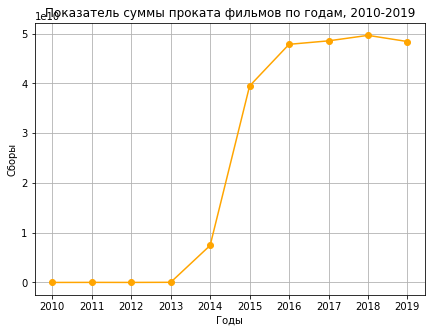

Максимальная сумма сборов:


,year,max,min,sum
8,2018,2.271754e+09,41225.0,4.966840e+10


Минимальная сумма сборов:


,year,max,min,sum
0,2010,1446400.0,75.0,2428654.0


In [64]:
boffice_per_year = df.pivot_table(index='year', values='box_office', aggfunc=['max', 'min', 'sum'])
boffice_per_year.reset_index(drop=False, inplace=True)
boffice_per_year.columns = ['year', 'max', 'min', 'sum']

display(boffice_per_year)

boffice_per_year.plot(
    kind='line',
    x='year', 
    y='sum',
    figsize=(7, 5),
    legend=False,
    title="Показатель суммы проката фильмов по годам, 2010-2019",
    style='o-',
    color='orange',
    xticks=df['year'].unique(),
    grid=True
)

plt.xlabel('Годы')
plt.ylabel('Сборы')
plt.show()

# Найдем годы с наибольшей и наименьшей суммой проката
print("Максимальная сумма сборов:")
display(boffice_per_year[boffice_per_year['sum'] == boffice_per_year['sum'].max()])
print("Минимальная сумма сборов:")
display(boffice_per_year[boffice_per_year['sum'] == boffice_per_year['sum'].min()])

В период с 2010 по 2014 годы наблюдаются крайне низкие значения по нескольким параметрам: максимального показателя, а также суммы сборов. Объяснить это можно либо ошибкой при заполнении данных о фильмах, выпущенных в этот промежуток времени, либо тем фактом, что, возможно, лишь небольшое количество кинотеатров предоставляло информацию о прокате фильмов в тот период. Крайне примечательно в этом плане значение медианного показателя: всего 2085 рублей. Ввиду сказанного ранее, минимальная сумма проката наблюдается именно за 2010 года, когда она составила всего 2 374 340 рублей.

Максимальная сумма сборов наблюдается за 2018 год с показателем равным почти 49,7 млрд рублей. В целом крайне высокие значения (более 40 млрд рублей) можно наблюдать в период с 2016 по 2019 годы.

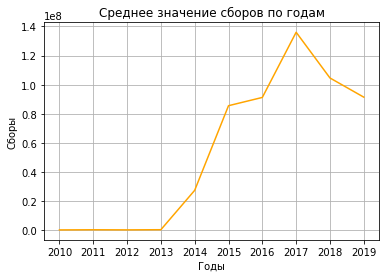

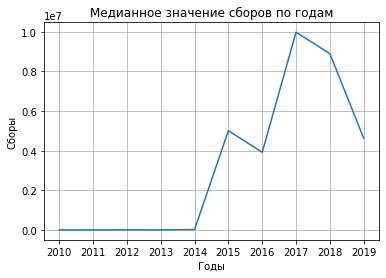

'Коэффициенте корреляции между средним значением сборов и долей фильмов с данными о прокате по годам: 0.9490322472539772'

In [65]:
mm_boffice_per_year = df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median', 'sum']).reset_index()
mm_boffice_per_year.columns = ['year','mean', 'median', 'sum']

mm_boffice_per_year.plot(
    x='year',
    y='mean',
    grid=True,
    color='orange',
    title="Среднее значение сборов по годам",
    legend=False,
    xticks=df['year'].unique(),
)
plt.xlabel('Годы')
plt.ylabel('Сборы')
plt.show()

mm_boffice_per_year.plot(
    x='year',
    y='median',
    title='Медианное значение сборов по годам',
    xticks=df['year'].unique(),
    grid=True,
    legend=False
)
plt.xlabel('Годы')
plt.ylabel('Сборы')
plt.show()

boffice_and_pt_per_year = mm_boffice_per_year.merge(pt_year_boffice_ratio, on='year')
display("Коэффициенте корреляции между средним значением сборов и долей фильмов с данными о прокате по годам: {}".format(
    boffice_and_pt_per_year['ratio'].corr(boffice_and_pt_per_year['mean'])))

На графиках можно заметить, что повышение средних и медианных значений сборов по годам начинается резко с 2014 и 2015 года соответственно. Более того, наибольшие значения приходится на 2017 год, а далее наблюдается спад в значениях обоих показателей. Также как и с максимальными и минимальными значениями, а также показателем суммы сборов, что в период с 2010 по 2014 годы можно отметить крайне низкие значения, что, вероятно, может быть вызвано или ошибкой, или непредоставление данных кинотеатрами.

**Вывод:** В случае суммы сборов по годам имеется тенденция к увеличению данного показателя, хотя в 2019 году заметно небольшое снижение данного значения по сравнению с 2018 году. Однако медианное и среднее значение ведет себя более непредсказуемо. Примечательно, что количество выпущенных фильмов и фильмов с данными о прокате в 2017 году меньше, чем в 2018 и 2019, но среднее и медианное значения в 2017 году выше. Можно лишь заметить сходство с графиком из проверки гипотезы № 1 с долей фильмов с данными о прокате по годам, когда наибольшее значение приходилось на 2017 год, но заметен спад в 2018-2019 годах. Более того, о высоком показателе сходства двух показателей говорит и коэффициент корреляции между ними: 0.938.

**Гипотеза 2 частично подтверждена**: Значения сборов (суммарное, среднее и медианное) выросли в конечном счете по сравнению с началом. Наибольшие значением приходятся на 2017-2019 годы, однако графики суммарного значения, а также медианного со средним в последние два года расходятся. Тем не мене, заметно сходство графиков среднего и медианного значения сборов по годам с графиком из гипотезы №1 с долей фильмов с данными о прокате по годам. О зависимости между параметрами говорит высокий коэффициент корреляции: 0.938.

[Вернуться к выводу](#boffice_depend_on_year_conclusion)

<a name="age_restriction"></a>
**Гипотеза № 3: имеется зависимость возрастным ограничением и такими параметрами, как сборами фильма и годом выхода**

'Наибольшее значение суммы оборота:'

,age_restriction,sum,median,mean
2,«16+» - для детей старше 16 лет,7.603473e+10,5604702.0,9.468834e+07


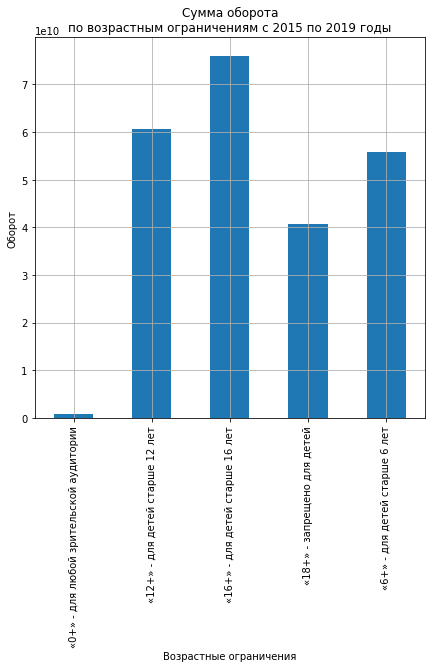

In [67]:
# Создание таблицы с суммой оборота по возрастным ограничениям
df_late_years = df[df['year'] > 2014]
age_restrict = df_late_years.pivot_table(
    index='age_restriction', 
    values='box_office', 
    aggfunc=['sum', 'median', 'mean']
).reset_index()

age_restrict.columns = ['age_restriction', 'sum', 'median', 'mean']

display("Наибольшее значение суммы оборота:")
display(age_restrict[age_restrict['sum'] == age_restrict['sum'].max()])
age_restrict.plot(
    kind='bar', 
    x='age_restriction', 
    y='sum', 
    legend=False,
    figsize=(7, 7),
    grid=True,
    xlabel='Возрастные ограничения',
    ylabel='Оборот',
    title='Сумма оборота\nпо возрастным ограничениям с 2015 по 2019 годы'
)
plt.show()

На предыдущем графике видна сумма сборов фильмов в зависимости от возрастного ограничения. Наибольшая суммая денег пришлась на фильмы с ограничением "16+", а наименьшая - "0+". Вероятно, это может быть связано со многими ограничениями в плане производства, а также наличия различных сцен, которые может быть запрещено демонстрировать детям. В то же самое время категория "18+" может включать в себя, например, сцены насилия и не только, ввиду чего многие даже взрослые люди не захотят их смотреть, поэтому самая доходная категория - "16+" - на нее приходится более 70 000 000 000 рублей. На втором и третьем месте по сумме кассовых сборов оказались категории "12+" и "6+" соответственно.

sum  count
age_restriction                        year                     
«0+» - для любой зрительской аудитории 2015  3.790546e+08     38
                                       2016  1.502288e+08     41
                                       2017  2.295989e+08      3
                                       2018  3.244900e+07      5
                                       2019  1.774607e+07      3
«12+» - для детей старше 12 лет        2015  1.361608e+10     72
                                       2016  1.220445e+10     82
                                       2017  7.851428e+09     41
                                       2018  1.426729e+10     67
                                       2019  1.268020e+10     85
«16+» - для детей старше 16 лет        2015  1.136812e+10    167
                                       2016  1.666455e+10    181
                                       2017  1.874504e+10    121
                                       2018  1.650360e+10    156
                                       2019  1.275342e+10    178
«18+» - запрещено для детей            2015  5.432308e+09    132
                                       2016  6.793930e+09    151
                                       2017  9.651496e+09    147
                                       2018  8.760086e+09    179
                                       2019  1.012180e+10    183
«6+» - для детей старше 6 лет          2015  8.701799e+09     53
                                       2016  1.205315e+10     70
                                       2017  1.208614e+10     45
                                       2018  1.010497e+10     68
                                       2019  1.285255e+10     81

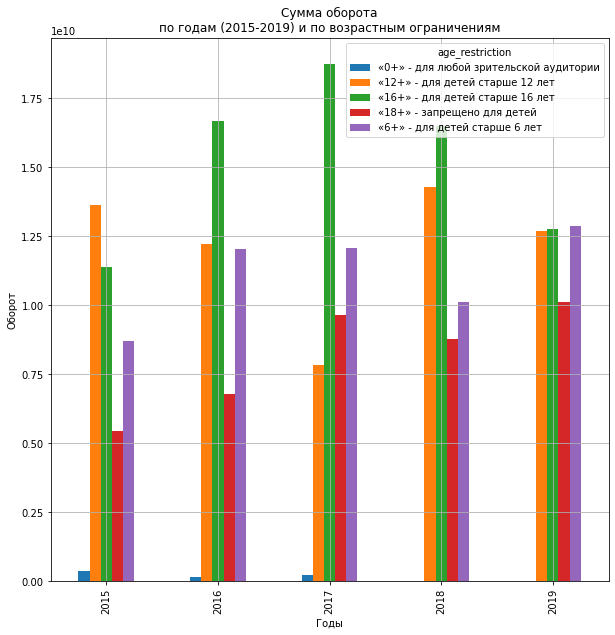

In [68]:
# Создание сводной таблицы для отображения совокупных сборов фильмов по возрастным ограничения по годам
df_year_age_restrict = df_late_years.pivot_table(
    index=['age_restriction', 'year'],
    values='box_office',
    aggfunc=['sum', 'count']
)

df_year_age_restrict.columns = ['sum', 'count']

display(df_year_age_restrict)

df_year_age_restrict['sum'].unstack(level=0).plot(
    kind='bar', 
    figsize=(10, 10), 
    grid=True,
    xlabel='Годы',
    ylabel='Оборот',
    title='Сумма оборота\nпо годам (2015-2019) и по возрастным ограничениям'
)
plt.show()

На графике выше видны суммы сборов по годам и возрастным ограничениям. Можно заметить, что в 2015 году, например, лидировала категория "12+", а далее в течение трех лет главенствующую позицию заняла категория "16+". В заключительном же году, в 2019-м, ситуация выглядит и вовсе иначе - суммы сборов по категория "6+", "12+" и "16+" почти равны между собой. Подобные колебания могут быть связаны с возрастными ограничениями самых кассовых фильмов за год (более 500 000 000 рублей). Проверим эту гипотезу:

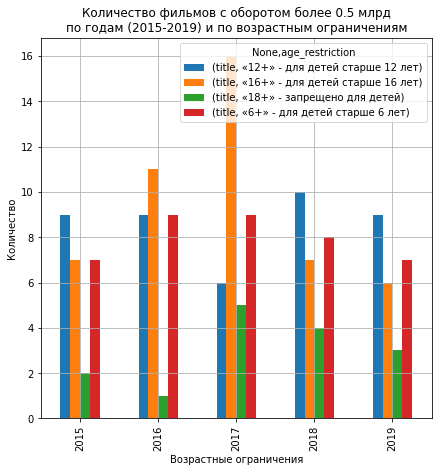

In [69]:
# Визуализация количества фильмов с оборот более 0.5 млрд по годам и возрастным ограничениям
df_years_age_restrict_count = df[(df['year'] > 2014) & (df['box_office'] > 500000000)].pivot_table(index=['age_restriction', 'year'], values='title', aggfunc='count')
df_years_age_restrict_count.unstack(level=0).plot(
    kind='bar', 
    figsize=(7, 7),
    grid=True,
    xlabel='Возрастные ограничения',
    ylabel='Количество',
    title='Количество фильмов с оборотом более 0.5 млрд\nпо годам (2015-2019) и по возрастным ограничениям',
)
plt.show()

В действительности, можно заметить, что в 2018 году количество фильмов с высокими кассовыми сборами с категорией "16+" было меньше, чем с категорией "12+", однако по сумме сборов именно именно фильмы с первым значением возглавенствовали. Стоит также отметить, что среди самых кассовых фильмов отсутствуют фильмы с возрастным ограничением "0+", поскольку, по-видимому, они слишком "безобидны", и ввиду этого подростки и люди постарше предпочитают их не смотреть.

**Вывод:** можно заметить, что в период с 2015 по 2019 по суммарному значению сборов лидерство взяли фильмы с возрастным ограничением "16+", причем по сумме такие фильмы стали самими кассовыми в 2016-2018 годах. Несильно отстает фильмы со значением параметра "12+". Однако, при рассмотрении самых кассовых фильмов (более 500 млн рублей в прокате) доминирование фильмов с "16+" не столь явно. Стоит отметить, что фильм с ограничениями "0+" и "18+" менее популярны и суммарно немного собирают в прокате.

**Гипотеза №3 частично подтверждена:** заметно, что фильмы "16+" по сумме сборов лидируют, по годам они занимают лидирующую позицию в 2016-2018 годах, однако самыми кассовыми фильмами выступают как фильмы с ограничением "16+", так и "12+". Связано не соответствие с тем, что количество выпускаемых "16+"-фильмов превышает количество фильмов других категорий.

[Вернуться к выводу](#age_restriction_conclusion)

<a name='state_support_research'></a>
## 4. Исследование фильмов с гос. поддержкой
[Вернуться во Введение](#introduction)

<a name='financing_source'></a>
**Гипотеза № 4: имеется зависимость между источником финансирования и оборотом фильма**

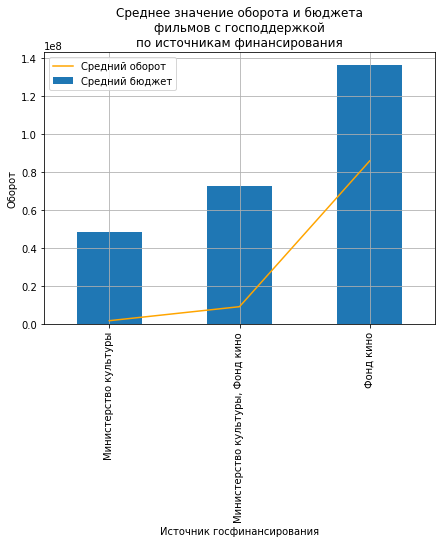

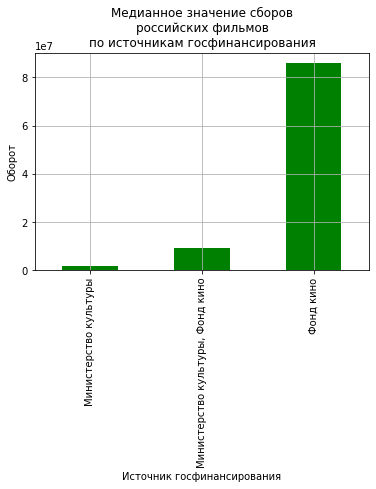

,financing_source,sum,median,count
0,Министерство культуры,5.322018e+09,1830820.47,152
1,"Министерство культуры, Фонд кино",8.053384e+08,9201590.05,22
2,Фонд кино,3.598615e+10,85888274.09,144
3,Без финансирования,1.056418e+10,140250.00,531


In [70]:
# Создадим сводную таблицу со медианным, суммарным значением оборота и кол-вом фильмов
financing_source_df = df.pivot_table(index='financing_source', values='box_office', aggfunc=['sum', 'median', 'count']).reset_index()
financing_source_df.columns = ['financing_source', 'sum', 'median', 'count']

# Создадим сводную таблицу со медианным и суммарным значением бюджета
fsource_budget_df = df.pivot_table(index='financing_source', values='budget', aggfunc=['sum', 'median']).reset_index()
fsource_budget_df.columns = ['financing_source', 'sum', 'median']

# Создадим график со значениями оборота и бюджета
ax = financing_source_df.plot(
    kind='line',
    x='financing_source',
    y='median',
    color='orange',
)

fsource_budget_df.plot(
    kind='bar',
    x='financing_source',
    y='median', 
    grid=True,
    figsize=(7, 5),
    ax=ax,
    title='Среднее значение оборота и бюджета\nфильмов с господдержкой\nпо источникам финансирования'
)

plt.xlabel("Источник госфинансирования")
plt.ylabel('Оборот')
plt.legend(['Средний оборот', 'Средний бюджет'])
plt.show()

# Рассмотрим фильмы по источнику финансирования по медианному значению сборов + фильмы без финансирования
no_financing_df = pd.Series(
    [
        "Без финансирования", 
        df[(df['financing_source'].isna()) & (df['production_country'].str.contains("Россия"))]['box_office'].sum(),
        df[(df['financing_source'].isna()) & (df['production_country'].str.contains("Россия"))]['box_office'].median(),
        df[(df['financing_source'].isna()) & (df['production_country'].str.contains("Россия"))]['box_office'].count()
    ],
    index=["financing_source", 'sum', 'median', 'count']
)

# Отобразим на графике медианное значение сборов российских фильмов по источникам госфинансирования
financing_source_df.plot(
    kind='bar',
    x='financing_source',
    y='median',
    legend=False,
    grid=True,
    color='green',
    xlabel='Источник госфинансирования',
    ylabel='Оборот',
    title='Медианное значение сборов\nроссийских фильмов\nпо источникам госфинансирования'
)
plt.show()

# Отобразим те же данные в табличном виде
financing_source_df = financing_source_df.append(no_financing_df, ignore_index=True)
display(financing_source_df)

На графике выше видны медианные значения сборов в зависимости от источника государственного финансирования. Дополнительно также была добавлена информация о медианном и суммарном значениях сборов российских фильмов, но уже без финансирования. Мы получили следующую картину: источником финансирования, медианного значение сборов фильмов которого наивысшее, является "Фонд кино" с показателем в примерно 85 млн рублей. Далее идут совместные проекты Министерства Культуры РФ и Фонда Кино - медианного значение сборов фильмов составляет около 9 млн рублей. Хуже делают обстоят с фильмами, финансируемые лишь Министерством Культуры - около 2 млн рублей, однако, данный показатель все равно в разы выше по сравнению со значениями сборов фильмов без господдержки. Медианное значение сборов в последнем случае составляет лишь 144 657 руб. Можно заметить, что имеется взаимосвязь между даже фактом господдержки фильма и его сборами. Тем не менее, по таблице видно, что суммарное значение сборов фильмов без господдержки достигает более 1 млрд руб., что является вторым показателем среди четырех источников финансирования (вслед за "Фондом Кино").

Важно отметить, что показатели бюджета фильмов Фондом Кино сильно превышают иные источники финансирования, однако и оборот их фильмов значительно выше. Тем не менее, важно отметить, что поскольку значения господдержки (по медианному показателю), как правило, меньше объема оборота, следовательно, немаленькое количество фильмов становится убыточными. Такой случай не является исключением для Фонда Кино и распространяется и на другие источники финансирования.

**Вывод**: можно отчетливо заметить зависимость между объемом выручки и источником финансирования. Однако, стоит отметить, что, хотя финансируемые государством фильмы и имеют более высокие медианные значения оборота, объем господдержки, как правило, превышает объем проката фильмов.

***Гипотеза № 4 подтверждена***: видна зависимость между оборотом фильма и источником финансирования. Так, фильмы, финансируемые лишь Фондом Кино, основываясь на медианном значении, собирают в прокате больше нежели фильмы с иными источниками финансирования. Стоит отметить, тем не менее, что чаще всего финансируемые государством фильмы являются убыточными.

[Вернуться к выводу](#financing_source_conclusion)

<a name="support_and_rating"></a>
**Гипотеза № 5: факт господдержки влияет на рейтинг фильма**

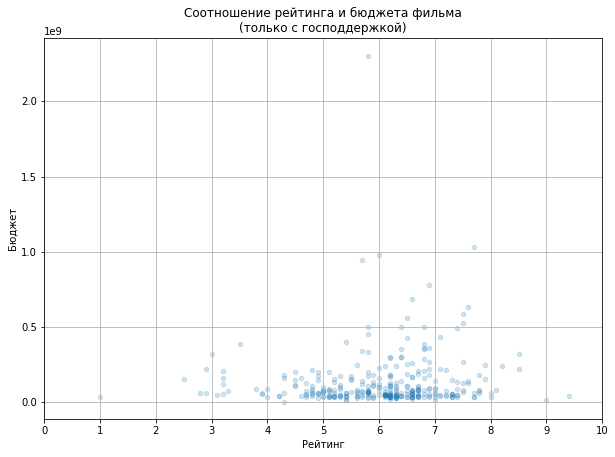

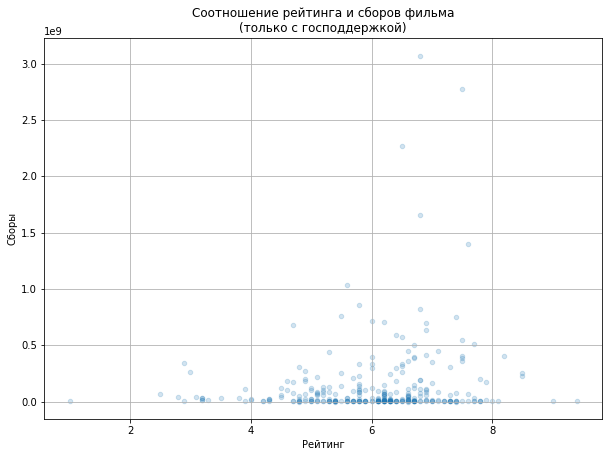

'Коэффициент корреляции между рейтингом и бюджетом фильма (с господдержкой): 0.08885517959968678'

'Коэффициент корреляции между рейтингом и сборами фильма (с господдержкой): 0.14375541497787275'

'Коэффициент корреляции между сборами и бюджетом фильма (с господдержкой): 0.37563132746541444'

In [71]:
financed_df = df[df['budget'].notna()][['budget', "box_office", "ratings"]].reset_index()

financed_df.plot(
    kind='scatter',
    x='ratings',
    y='budget',
    alpha=0.2,
    xticks=(range(0, 11)),
    figsize=(10, 7),
    grid=True,
    title="Соотношение рейтинга и бюджета фильма\n(только с господдержкой)",
    xlabel='Рейтинг',
    ylabel='Бюджет'
)
plt.show()


financed_df.plot(
    kind='scatter',
    x='ratings',
    y='box_office',
    alpha=0.2,
    figsize=(10, 7),
    grid=True,
    title='Соотношение рейтинга и сборов фильма\n(только с господдержкой)',
    xlabel='Рейтинг',
    ylabel='Сборы'
)
plt.show()

display("Коэффициент корреляции между рейтингом и бюджетом фильма (с господдержкой): {}".format(financed_df['ratings'].corr(financed_df['budget'])))
display("Коэффициент корреляции между рейтингом и сборами фильма (с господдержкой): {}".format(financed_df['ratings'].corr(financed_df['box_office'])))
display("Коэффициент корреляции между сборами и бюджетом фильма (с господдержкой): {}".format(financed_df['budget'].corr(financed_df['box_office'])))

Далее были рассмотрены возможные взаимосвязи между рейтингом, бюджетом и сборами фильмов с господдержкой. Согласно графикам, а также коэффициентам корреляции, наблюдается крайне низкая корреляция между бюджетом и рейтингом фильма - коэффициент корреляции всего 0.09, что говорит о почти отсутствии взаимосвязи. В дополнение низкое значение коэффициента корреляции можно заметить и между рейтингом и сборами фильма - всего 0,14. Однако, показатель, который наибОльшим образом влияет на сборы фильма является его бюджет, хотя, о высокой корреляции между двумя показателями говорить не приходится, поскольку ее значение составляет 0,376, что говорит лишь о слабой взаимосвязи.

**Вывод:** разброс значений фильмов по рейтингу с господдержкой сильно велик. В дополнение коэффициент корреляции между такими параметрами, как рейтингом и бюджетом, а также рейтингом и сборами фильма составляет всего 0,09 и 0,14 соответственно, что говорит почти об отсутствии взаимосвязи между показателями. Наблюдается лишь слабая взаимосвязь между сборами и бюджетом фильмов - коэффициент корреляции составляет 0,376.

***Гипотеза №5 неподтверждена:*** не наблюдается зависимость между значением показателя рейтинга, а также бюджетом и сборами фильма. Слабый характер взаимосвязи наблюдается между сборами и объем финансовой поддержки.


[Вернуться к выводу](#support_and_rating_conclusion)

<a name='main_genre_support'></a>

**Гипотеза №6: имеется зависимость между основным жанром фильмов с господдержкой и сборами**

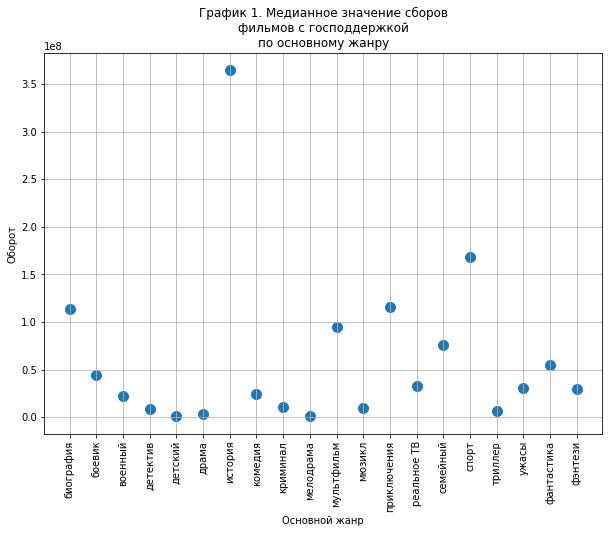

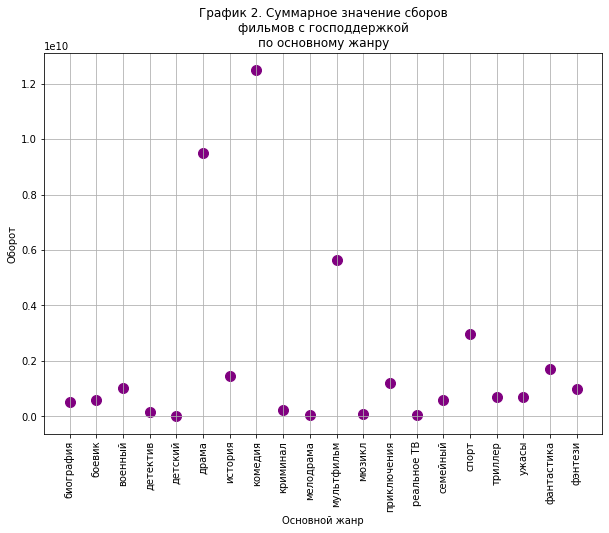

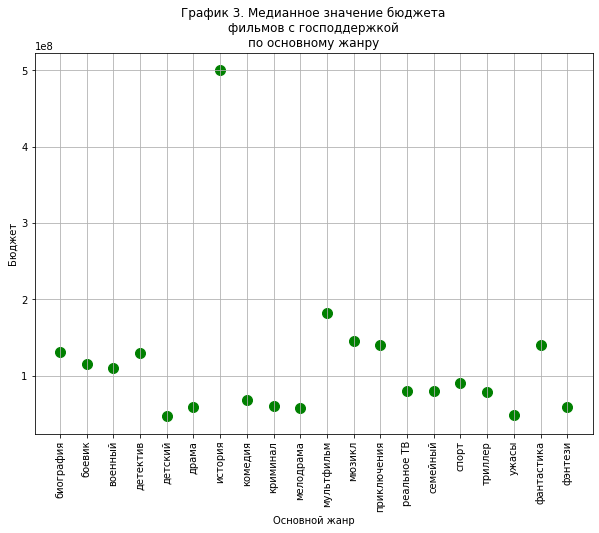

In [72]:
#Создадим сводную таблицу по медианному и суммарному значению сборов фильмов с господдержкой по основному жанру
main_genre_support_boffice_df = df[df["budget"].notna()].pivot_table(
    index="main_genre", 
    values="box_office", 
    aggfunc=['median', 'sum']
).reset_index()
main_genre_support_boffice_df.columns = ["main_genre", "median", "sum"]

# Выведем график с медианными значениями сборов по основному жанру
main_genre_support_boffice_df.plot(
    kind="scatter",
    x="main_genre",
    y="median",
    grid=True,
    legend=True,
    figsize=(10, 7),
    xlabel='Основной жанр',
    ylabel='Оборот',
    s=100,
    title='График 1. Медианное значение сборов\nфильмов с господдержкой\nпо основному жанру',
)

plt.xticks(rotation=90)
plt.show()

# Выведем график с суммарными значениями сборов по основному жанру
main_genre_support_boffice_df.plot(
    kind='scatter',
    x='main_genre',
    y='sum',
    color='purple',
    grid=True,
    figsize=(10, 7),
    xlabel='Основной жанр',
    ylabel='Оборот',
    s=100,
    title='График 2. Суммарное значение сборов\nфильмов с господдержкой\nпо основному жанру'
)

plt.xticks(rotation=90)
plt.show()

# Создадим сводную таблицу с бюджетом фильмов по основному жанру
main_genre_budget_df = df[df['budget'].notna()].pivot_table(
    index='main_genre',
    values='budget',
    aggfunc='median'
).reset_index()
main_genre_budget_df.columns = ['main_genre', 'median']

# Построим график по медианному значению бюджета фильма по основному жанру
main_genre_budget_df.plot(
    kind='scatter',
    x='main_genre',
    y='median',
    color='green',
    legend=False,
    grid=True,
    s=100,
    figsize=(10, 7),
    title='График 3. Медианное значение бюджета\nфильмов с господдержкой\nпо основному жанру',
    xlabel='Основной жанр',
    ylabel='Бюджет'
)

plt.xticks(rotation=90)
plt.show()

На графиках выше можно заметить, что фильмы с господдержкой по жанрам с максимальными медианными и суммарными значениями не совпадают.

Так, на первом графике можно заметить, что по медианному значению сборов лидируют фильмы с основным жанром "история". Следом с показателем почти вдвое меньше идет "спорт", а потом "приключения", "биография" и "мультфильм".

В случае же с суммарным значением сбором главенствуют фильмы с жанром "комедия", а следом, не сильно уступая, идет "драма". Третью позицию занимают фильмы в жанре "мультфильм".

Поскольку суммарное значение сборов может демонстрировать, что количество фильмов определенного жанра превышает другие, следовательно, лучше ориентироваться на медианный показатель сборов. В таком случае заметно, что господдержку получают фильмы в ранее упомянутых жанрах: "история", "спорт", "приключения", "биография" и "мультфильм".

**Вывод:** можно заметить, что более высокие медианные значения сборов приходятся на фильмы с жанрами "спорт", "приключения", "биография" и "мультфильм". Лидируют по суммарным значения такие жанры, как "комедия", "драма" и "мультфильм". Тем не менее, есть жанр, который демонстрирует окупаемость за счет положительной разницы между медианными значениями сборов и бюджета - и это "спорт".

***Гипотеза №6 частично подтверждена:*** наблюдается относительно высокие медианные значения сборов некоторых жанров "история", "спорт", "биография", "мультфильм", однако окупается, судя по медианному значению, лишь жанр "спорт", где объем сборов превышает объем финансирования.

[Вернуться к выводу](#main_genre_support_conclusion)

<a name='support_type'></a>

**Гипотеза № 7: имеется взаимосвязь между сборами фильмов с господдержкой и их типами**

In [73]:
type_support_df = df[(df["budget"].notna()) & (df['box_office'].notna())].pivot_table(index="type", values="box_office", aggfunc=['median', 'sum']).reset_index()
type_support_df.columns = ["type", "median", "sum"]

display(type_support_df)

print("\n\nФильмы с господдержкой с типом \"Документальный\":")
df[(df['budget'].notna()) & (df['type'] == "Документальный")]

,type,median,sum
0,Анимационный,9.494031e+07,5.623293e+09
1,Художественный,1.097262e+07,3.649022e+10




Фильмы с господдержкой с типом "Документальный":


,title,puNumber,show_start_date,year,type,film_studio,production_country,director,main_director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,main_genre,box_office,gov_support
7179,Байкал - Сердце мира 3D,112004619,2019-11-01,2019,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,3000000.0,33000000.0,Министерство культуры,8.0,семейный,семейный,NaN,0.090909


**Вывод**: можно заметить, что анимационные фильмы по медианному значению собирают больше нежели художественные, однако суммарные сборы все же больше приходятся на художественные фильмы, что означает лишь, что художественных фильмов выпускается больше. Документальный фильм с господдержкой и вовсе лишь один.

***Гипотеза № 7 подтверждена***: художественные фильмы собирают по медианному значению больше - около 94 940 310 рублей, а художественные - около 11 млн рублей. Выборка среди документальных фильмов ограничивается одним фильмом, что крайне мало для проведения анализа.

[Вернуться к выводу](#support_type_conclusion)

<a name="boffice_support_year"></a>

**Гипотеза №8: имеется зависимость между сборами фильмов с господдержкой и годом их выпуска**

*В дополнение рассмотрим также окупаемость финансируемых фильмов по годам*

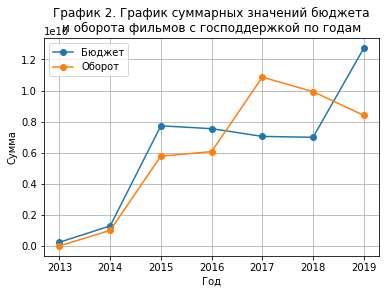

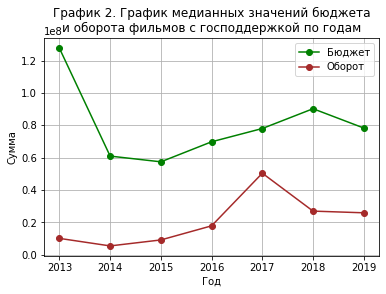

,year,boffice_sum,boffice_median,budget_sum,budget_median
0,2013,2.032239e+07,10161192.55,2.554354e+08,127717695.0
1,2014,1.017422e+09,5504517.85,1.302485e+09,61036441.5
2,2015,5.785285e+09,9200824.50,7.738669e+09,57493985.5
3,2016,6.081708e+09,17921115.61,7.554943e+09,69883049.0
4,2017,1.086508e+10,50451949.00,7.057173e+09,78096315.0
5,2018,9.934069e+09,27023390.31,7.000664e+09,90324563.5
6,2019,8.409627e+09,25977291.30,1.272287e+10,78388683.0


'Коэфициент корреляции между годом выпуска и суммой сборов: 0.8842841917098377'

'Коэффициент корреляции между годом выпуска и суммой бюджета: 0.8772680979897718'

'Коэффициент корреляции между годом выпуска и медианным значением сборов: 0.6572822205833222'

'Коэффициент корреляции между годом выпуска и медианным значение бюджета: -0.2244315656844591'

In [74]:
# Сводная таблица совокупных и медианных сборов по годам с господдержкой
year_boffice_support_df = df[df['budget'].notna()].pivot_table(
    index='year', 
    values='box_office', 
    aggfunc=['sum', 'median']
).reset_index()
year_boffice_support_df.columns = ['year', 'boffice_sum', 'boffice_median']

# Сводная таблица совокупных и медианных объемов поддержки по годам 
year_support_df = df[df['year'] > 2012].pivot_table(
    index='year',
    values='budget',
    aggfunc=['sum', 'median']
).reset_index()
year_support_df.columns = ['year', 'budget_sum', 'budget_median']

year_boffice_support_df = year_boffice_support_df.merge(year_support_df, on='year', how='outer')

# Отображение с помощью графиков
ax1 = year_boffice_support_df.plot(
    kind='line',
    x='year',
    y='budget_sum',
    style='o-',
)

year_boffice_support_df.plot(
    kind='line',
    x='year',
    y='boffice_sum',
    style='o-',
    grid=True,
    ax=ax1,
    xlabel='Год',
    ylabel='Сумма',
    title='График 2. График суммарных значений бюджета\nи оборота фильмов с господдержкой по годам'
)

plt.legend(["Бюджет", "Оборот"])
plt.show()

ax2 = year_boffice_support_df.plot(
    kind='line',
    x='year',
    y='budget_median',
    style='o-',
    color='green'
)

year_boffice_support_df.plot(
    kind='line',
    x='year',
    y='boffice_median',
    style='o-',
    color='brown',
    grid=True,
    ax=ax2,
    xlabel='Год',
    ylabel='Сумма',
    title='График 2. График медианных значений бюджета\nи оборота фильмов с господдержкой по годам'
)

plt.legend(['Бюджет', "Оборот"])
plt.show()

display(year_boffice_support_df)

display("Коэфициент корреляции между годом выпуска и суммой сборов: {}".format(
    year_boffice_support_df['year'].corr(year_boffice_support_df['boffice_sum'])))
display("Коэффициент корреляции между годом выпуска и суммой бюджета: {}".format(
    year_boffice_support_df['year'].corr(year_boffice_support_df['budget_sum'])))
display("Коэффициент корреляции между годом выпуска и медианным значением сборов: {}".format(
    year_boffice_support_df['year'].corr(year_boffice_support_df['boffice_median'])))
display("Коэффициент корреляции между годом выпуска и медианным значение бюджета: {}".format(
    year_boffice_support_df['year'].corr(year_boffice_support_df['budget_median'])))

**Вывод:** На графиках можно заметить, что окупаемость фильмов с господдержкой целиком наблюдалась лишь в 2017-м и 2018-м годах, в то время как в иные годы бюджет фильмов суммарно превышал объем сборов. Ситуация с медианными значениями немного иная: в данном случае во все годы наблюдается превышение бюджета над прокатом фильма с господдержкой. 

Cтоит рассмотреть коэффициенты корреляции между: а) годом выпуска и суммой сборов, б) годом выпуска и суммой бюджета, в) годом выпуска и медианным значением сборов, г) годом выпуска и медианным значением бюджета, которые составляют 0.88, 0.87, 0.66 и -0.22 соответственно. Заметно, что с каждым годом сумма бюджета, как и сумма сборов увеличивается, однако медианное значение бюджета снижается, хотя медианные сборы фильмов растут, что говорит о том, что выпускается больше фильмов и их медианные сборы растут.

***Гипотеза №8 частично подтверждена:*** коэффициенты корреляции, как и графики выше говорят о том, что имеется взаимосвязь между годом выпуска, объемом финансирования и объемом сборов. Более того заметны некоторые тенденции с течением времени: медианное значение бюджета снижается незначительно (коэффициент корреляции составлять -0.22), а медианное значение сборов растет.

[Вернуться к выводу](#boffice_support_year_conclusion)

<a name="conclusion"></a>
## 5. Общий вывод
[Вернуться во Введение](#introduction)

Было проведено исследование по данным о фильмах с портала "Кинопоиск". Задача состояла первоначально в осуществлении предобработки данных (рассмотрении некорретных значений, обработки пропущенных значений, а также возможное удаление дубликатов при их наличии), а также в анализе данных на поиск различных особенности и взаимозависимостей разных параметров между собой.

Был проведен исследовательский анализ данных на выявление закономерностей, и были проведены следующие исследования: 1) динамика выхода количества фильмов по годам, 2) динамика проката фильмов по годам, 3) средние и медианные значения сборов фильмов по годам, 4) зависимость между возрастным ограничением и такими параметрами, как суммой сборов и годом выхода. 

В дополнение были исследования фильмы, которые получили государственную поддержку на зависимость следующих параметров: I) медианное значение сборов и источник финансирования, II) рейтинг и такие параметры, как сборы фильма и бюджет фильма, III) наличие господдержки и объем сборов по основному жанру фильма, IV) наличие господдержки и значение сборов по типу фильма, V) наличие господдержки и объем сборов по году выпуска.

Перед проведением исследовательского анализа данных по исследованиям были поставлены несколько гипотез:
- Гипотеза 1: Год выпуска влияет на количество фильмов с данными о прокате;
- Гипотеза 2: Значение сборов фильмов зависит от года выхода;
- Гипотеза 3: Имеется зависимость между возрастным ограничением и такими параметрами, как сборы фильма и годом выход

Следующим этапом исследования необходимо было провести анализ фильмов, получивших государственную поддержку. Далее рассмотрим следующие гипотезы:
- Гипотеза 4: имеется зависимость между источником финансирования и оборотом фильма
- Гипотеза 5: факт господдержки влияет на рейтинг фильма
- Гипотеза 6: имеется зависимость между основным жанром фильма с господдержкой и сборами
- Гипотеза 7: имеется взаимосвязь между сборами фильмов с господдержкой и их типами
- Гипотеза 8: имеется зависимость между сборами фильмов с господдержкой и годом их выпуска

<a name="year_and_data_boffice_conclusion"></a>
**Гипотеза № 1. Год выхода влияет на количество фильмов с данными о прокате**
 
[Код и графики проверки гипотезы №1](#year_and_data_boffice)

***Вывод***: наиболее полно представлена вторая половина рассматриваемого периода (с 2015 по 2019 годы), однако все же не у всех фильмов, выпущенных в эти годы, имеются данные о сборах, и в 2019 году доля таких произведений исскусства составила чуть менее 60%.

***Гипотеза № 1 частично подтверждена***. Доля фильмов с данными о прокате с течением времени выросла, однако, все равно заметны сильные колебания, что видно на втором графике.

<a name="boffice_depend_on_year_conclusion"></a>

**Гипотеза № 2. Значение сборов фильмов зависит от года выхода.**

[Код и графики проверки гипотезы №2](#boffice_depend_on_year)

***Вывод:*** В случае суммы сборов по годам имеется тенденция к увеличению данного показателя, хотя в 2019 году заметно небольшое снижение данного значения по сравнению с 2018 году. Однако медианное и среднее значение ведет себя более непредсказуемо. Примечательно, что количество выпущенных фильмов и фильмов с данными о прокате в 2017 году меньше, чем в 2018 и 2019, но среднее и медианное значения в 2017 году выше. Можно лишь заметить сходство с графиком из проверки гипотезы № 1 с долей фильмов с данными о прокате по годам, когда наибольшее значение приходилось на 2017 год, но заметен спад в 2018-2019 годах. Более того, о высоком показателе сходства двух показателей говорит и коэффициент корреляции между ними: 0.938.

***Гипотеза 2 частично подтверждена***: Значения сборов (суммарное, среднее и медианное) выросли в конечном счете по сравнению с началом. Наибольшие значением приходятся на 2017-2019 годы, однако графики суммарного значения, а также медианного со средним в последние два года расходятся. Тем не мене, заметно сходство графиков среднего и медианного значения сборов по годам с графиком из гипотезы №1 с долей фильмов с данными о прокате по годам. О зависимости между параметрами говорит высокий коэффициент корреляции: 0.938.

<a name="age_restriction_conclusion"></a>

**Гипотеза № 3: имеется зависимость между возрастным ограничением и такими параметрами, как сборы фильма и годом выхода**

[Код и граифики проверки гипотезы №3](#age_restriction)

***Вывод:*** можно заметить, что в период с 2015 по 2019 по суммарному значению сборов лидерство взяли фильмы с возрастным ограничением "16+", причем по сумме такие фильмы стали самими кассовыми в 2016-2018 годах. Несильно отстает фильмы со значением параметра "12+". Однако, при рассмотрении самых кассовых фильмов (более 500 млн рублей в прокате) доминирование фильмов с "16+" не столь явно. Стоит отметить, что фильм с ограничениями "0+" и "18+" менее популярны и суммарно немного собирают в прокате.

***Гипотеза №3 частично подтверждена:*** заметно, что фильмы "16+" по сумме сборов лидируют, по годам они занимают лидирующую позицию в 2016-2018 годах, однако самыми кассовыми фильмами выступают как фильмы с ограничением "16+", так и "12+". Связано не соответствие с тем, что количество выпускаемых "16+"-фильмов превышает количество фильмов других категорий.

<a name='financing_source_conclusion'></a>

**Гипотеза №4: имеется зависимость между источником финансирования и оборотом фильма**

[Код и графики проверки гипотезы №4](#financing_source)

**Вывод**: можно отчетливо заметить зависимость между объемом выручки и источником финансирования. Однако, стоит отметить, что, хотя финансируемые государством фильмы и имеют более высокие медианные значения оборота, объем господдержки, как правило, превышает объем проката фильмов.

***Гипотеза № 4 подтверждена***: видна зависимость между оборотом фильма и источником финансирования. Так, фильмы, финансируемые лишь Фондом Кино, основываясь на медианном значении, собирают в прокате больше нежели фильмы с иными источниками финансирования. Стоит отметить, тем не менее, что чаще всего финансируемые государством фильмы являются убыточными.

<a name='support_and_rating_conclusion'></a>

**Гипотеза №5: факт господдержки влияет на рейтинг фильма**

[Код и графики проверки гипотезы №5](#support_and_rating)

**Вывод:** разброс значений фильмов по рейтингу с господдержкой сильно велик. В дополнение коэффициент корреляции между такими параметрами, как рейтингом и бюджетом, а также рейтингом и сборами фильма составляет всего 0,09 и 0,14 соответственно, что говорит почти об отсутствии взаимосвязи между показателями. Наблюдается лишь слабая взаимосвязь между сборами и бюджетом фильмов - коэффициент корреляции составляет 0,376.

***Гипотеза №5 не подтверждена:*** не наблюдается зависимость между значением показателя рейтинга, а также бюджетом и сборами фильма. Слабый характер взаимосвязи наблюдается между сборами и объем финансовой поддержки.

<a name='main_genre_support_conclusion'></a>
**Гипотеза №6: имеется зависимость между основным жанром фильма с господдержкой и сборами** 

[Код и графики проверки гипотезы №6](#main_genre_support)

**Вывод**: можно заметить, что более высокие медианные значения сборов приходятся на фильмы с жанрами "спорт", "приключения", "биография" и "мультфильм". Лидируют по суммарным значения такие жанры, как "комедия", "драма" и "мультфильм". Тем не менее, есть жанр, который демонстрирует окупаемость за счет положительной разницы между медианными значениями сборов и бюджета - и это "спорт".

***Гипотеза №6 частично подтверждена***: наблюдается относительно высокие медианные значения сборов некоторых жанров "история", "спорт", "биография", "мультфильм", однако окупается, судя по медианному значению, лишь жанр "спорт", где объем сборов превышает объем финансирования.

<a name='support_type_conclusion'></a>

**Гипотеза №7: имеется взаимосвязь между сборами фильмов с господдержкой и их типами**

[Код и графики проверки гипотезы №7](#support_type)

**Вывод**: можно заметить, что анимационные фильмы по медианному значению собирают больше нежели художественные, однако суммарные сборы все же больше приходятся на художественные фильмы, что означает лишь, что художественных фильмов выпускается больше. Документальный фильм с господдержкой и вовсе лишь один.

***Гипотеза № 7 подтверждена***: художественные фильмы собирают по медианному значению больше - около 94 940 310 рублей, а художественные - около 11 млн рублей. Выборка среди документальных фильмов ограничивается одним фильмом, что крайне мало для проведения анализа.

<a name="boffice_support_year_conclusion"></a>

**Гипотеза №8: имеется зависимость между сборами фильмов с господдержкой и годом их выпуска**

[Код и графики проверки гипотезы №8](#boffice_support_year)

**Вывод:** На графиках можно заметить, что окупаемость фильмов с господдержкой целиком наблюдалась лишь в 2017-м и 2018-м годах, в то время как в иные годы бюджет фильмов суммарно превышал объем сборов. Ситуация с медианными значениями немного иная: в данном случае во все годы наблюдается превышение бюджета над прокатом фильма с господдержкой. 

Cтоит рассмотреть коэффициенты корреляции между: а) годом выпуска и суммой сборов, б) годом выпуска и суммой бюджета, в) годом выпуска и медианным значением сборов, г) годом выпуска и медианным значением бюджета, которые составляют 0.88, 0.87, 0.66 и -0.22 соответственно. Заметно, что с каждым годом сумма бюджета, как и сумма сборов увеличивается, однако медианное значение бюджета снижается, хотя медианные сборы фильмов растут, что говорит о том, что выпускается больше фильмов и их медианные сборы растут.

***Гипотеза №8 частично подтверждена:*** коэффициенты корреляции, как и графики выше говорят о том, что имеется взаимосвязь между годом выпуска, объемом финансирования и объемом сборов. Более того заметны некоторые тенденции с течением времени: медианное значение бюджета снижается незначительно (коэффициент корреляции составлять -0.22), а медианное значение сборов растет.

**Общие рекомендации:**
1. Возможно, стоит добавить такой столбец, как "главные актеры", для поиска возможной взаимосвязи между снимающимися в фильме актерами и сборами;
2. Необходимо дополнить данные фильмов касательно проката.